In [2]:
library(ggplot2)
library(data.table)
theme_set(theme_bw())
# library(ggpubr)

In [3]:
setwd('~/m/msingle/mess/124_singlem-benchmarking')

In [4]:
# from plot.ipynb in folder 2
novelty_benchmark_results = fread('2_phylogenetic_novelty/bray_curtis.tsv')
table(novelty_benchmark_results$tool)


   coverm     kaiju    kraken metaphlan     motus   singlem  sourmash 
      840       840       840       840       840       840       840 

In [5]:
orders = c('kingdom','phylum','class','order','family','genus','species')
novelty_benchmark_results[, rank := factor(rank, levels=orders)]
novelty_benchmark_results[, novelty_category := factor(novelty_category, levels=orders)]
tools = c('singlem', 'metaphlan', 'motus', 'kraken', 'sourmash', 'kaiju', 'coverm')
novelty_benchmark_results[, tool := factor(tool, levels=tools)]
novel_orders = gsub('^','novel ',orders)
novelty_benchmark_results[, novelty_category_novel := factor(novelty_category_novel, levels=novel_orders)]

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


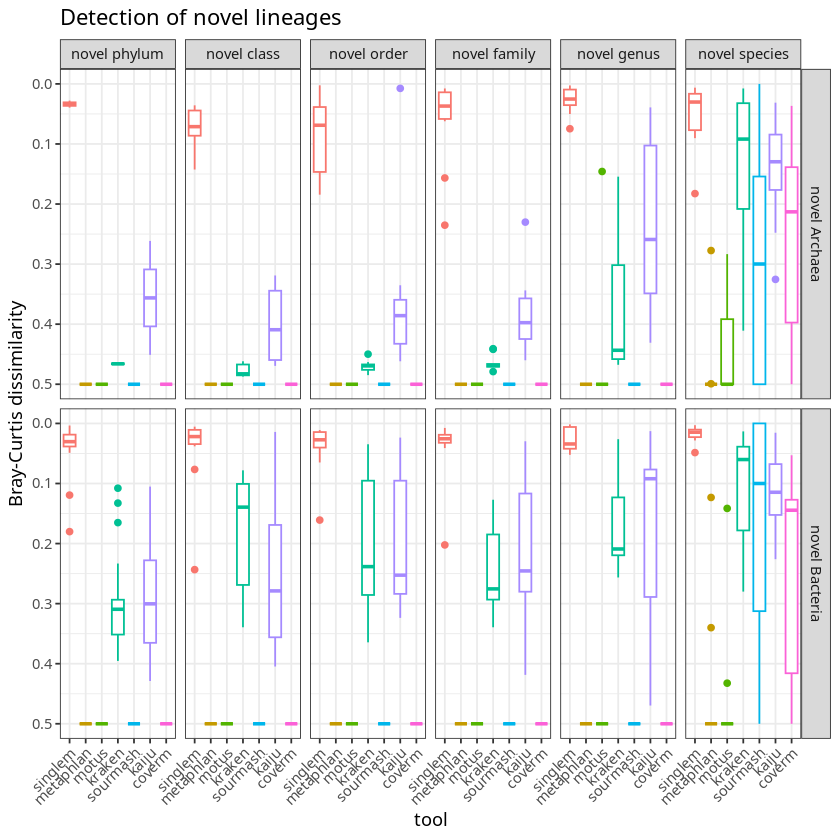

In [6]:
qplot(data=novelty_benchmark_results[rank=='kingdom'], tool, value, geom='boxplot', main='Detection of novel lineages', colour=tool, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

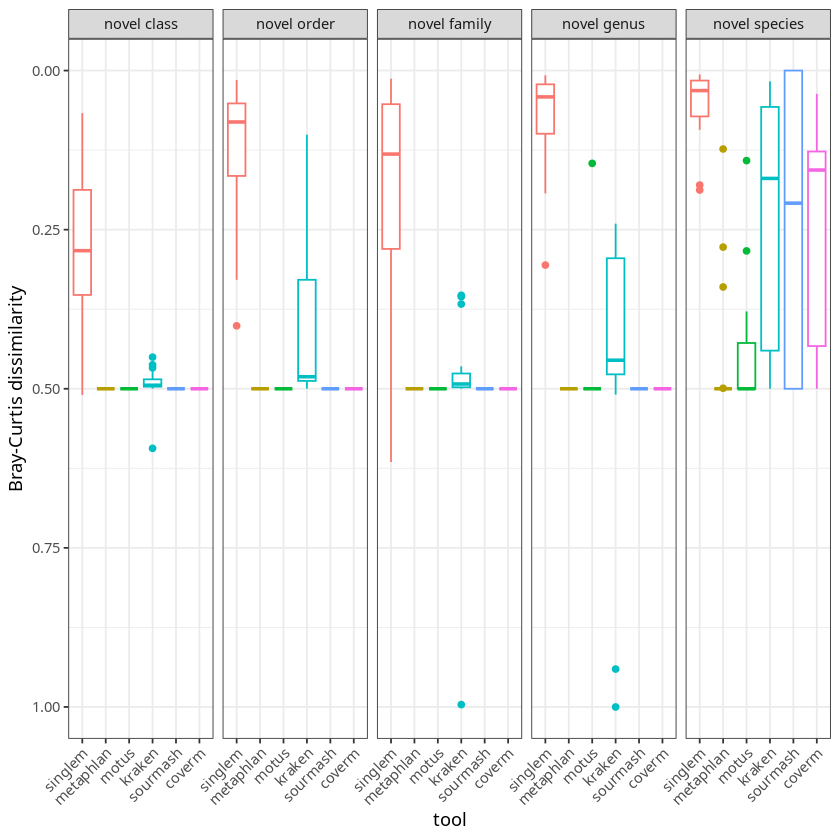

In [7]:
# What about when the rank equals one level above the novelty category?

# novelty_benchmark_results
# novelty_benchmark_results[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-1]]
qplot(data=novelty_benchmark_results[tool != 'kaiju'][novelty_category != 'phylum'][rank==orders[as.numeric(novelty_category)-1]], colour=tool, ylab='Bray-Curtis dissimilarity', tool, value, geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse()

In [8]:
# Read non-novelty results
marine = fread('1_novel_strains/bray-curtis.csv')

In [9]:
runtimes = fread('1_novel_strains/runtime.csv')
# runtimes[tool=='coverm']

# Mock up coverm runtimes while we wait for results
coverm_runs1 = runtimes[tool=='coverm']
coverm_runs1[, s := 32*s]
coverm_runs1[, threads := 1]
coverm_runs8 = runtimes[tool=='coverm']
coverm_runs8[, s := 4*s]
coverm_runs8[, threads := 8]

runtimes = rbind(runtimes, coverm_runs1, coverm_runs8)

In [16]:
novelty_benchmark_results[tool=='singlem', tool2 := 'SingleM']
novelty_benchmark_results[tool=='metaphlan', tool2 := 'MetaPhlAn']
novelty_benchmark_results[tool=='motus', tool2 := 'mOTUs']
novelty_benchmark_results[tool=='kraken', tool2 := 'Kraken2+Bracken']
novelty_benchmark_results[tool=='sourmash', tool2 := 'sourmash']
novelty_benchmark_results[tool=='kaiju', tool2 := 'Kaiju']
novelty_benchmark_results[tool=='coverm', tool2 := 'CoverM']
tools2_order = c('SingleM','MetaPhlAn','mOTUs','Kraken2+Bracken','sourmash','Kaiju','CoverM')
novelty_benchmark_results[, tool2 := factor(tool2, levels=tools2_order)]

marine[tool=='singlem', tool2 := 'SingleM']
marine[tool=='metaphlan', tool2 := 'MetaPhlAn']
marine[tool=='motus', tool2 := 'mOTUs']
marine[tool=='kraken', tool2 := 'Kraken2+Bracken']
marine[tool=='sourmash', tool2 := 'sourmash']
marine[tool=='kaiju', tool2 := 'Kaiju']
marine[tool=='coverm', tool2 := 'CoverM']
marine[, tool2 := factor(tool2, levels=tools2_order)]

runtimes[tool=='singlem', tool2 := 'SingleM']
runtimes[tool=='metaphlan', tool2 := 'MetaPhlAn']
runtimes[tool=='motus', tool2 := 'mOTUs']
runtimes[tool=='kraken', tool2 := 'Kraken2+Bracken']
runtimes[tool=='sourmash', tool2 := 'sourmash']
runtimes[tool=='kaiju', tool2 := 'Kaiju']
runtimes[tool=='coverm', tool2 := 'CoverM']
runtimes[, tool2 := factor(tool2, levels=tools2_order)]

my_colours = c(
#1b9e77 Dark2
#d95f02
#7570b3
#e7298a
#66a61e
#e6ab02
#a6761d
#666666
'#e7298a',
'#1b9e77',
'#d95f02',
'#7570b3',
'#66a61e',
'#e6ab02',
'#a6761d',
'#666666'

#     '#e7298a','#1b9e77', #?
# '#d95f02',
# '#7570b3',

# '#66a61e',
# '#e6ab02'
)
options(repr.plot.width=7, repr.plot.height=10)

library(ggbreak)
runtimes2 = runtimes[threads==1, .(mins=mean(s/60), max_rss=mean(max_rss/1000)), by=.(tool2)]

In [17]:
# ggbreak doesn't get applied so can't use ggarrange


# rp = qplot(data=runtimes2, xlab='', tool2, mins, geom='col', fill=tool2, ylab='Runtime (mins)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)+scale_y_break(c(750,6200))

# library(patchwork)

# ggarrange(
#     qplot(data=novelty_benchmark_results[rank=='kingdom'], xlab='', tool2, value, geom='boxplot', colour=tool2, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none') +scale_color_manual(breaks=tools2_order, values=my_colours)+scale_y_reverse(),

#     qplot(data=novelty_benchmark_results[tool != 'kaiju'][rank==orders[as.numeric(novelty_category)-1]], colour=tool2, ylab='Dissimilarity', tool2, value, xlab='', geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse() +scale_color_manual(breaks=tools2_order, values=my_colours),

#     ggarrange(
#         qplot(data=marine[rank=='species'], xlab='', ylim=c(0.6,0), tool2, value, geom='boxplot', colour=tool2, ylab='Dissimilarity') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours),

#         rp,

#         qplot(data=runtimes[threads==1], xlab='', tool2, max_rss/1000, geom='boxplot', colour=tool2, ylab='Memory (GB)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours),

#         labels=c('C','D','E'),
#         nrow=1
#     ),

#     nrow=3,
#     labels=c('A','B'),
#     heights=c(2,1.2,1.2)
# )

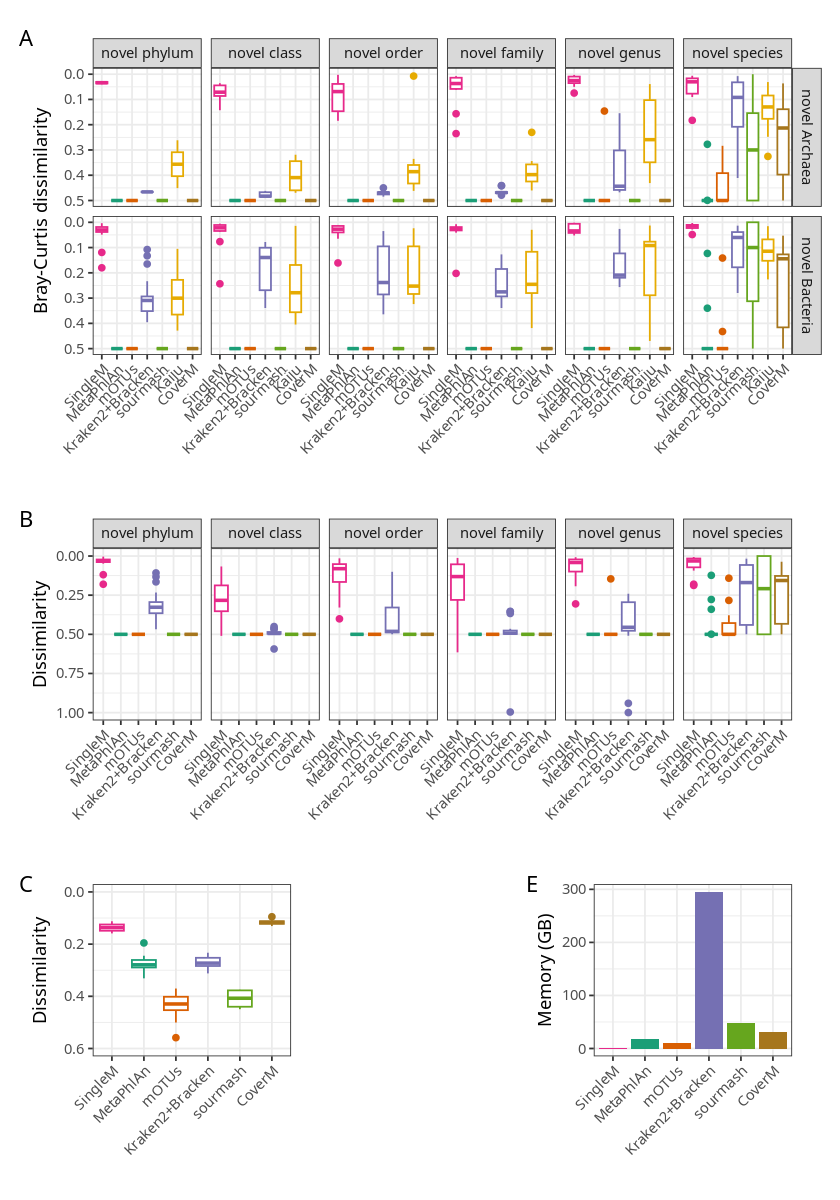

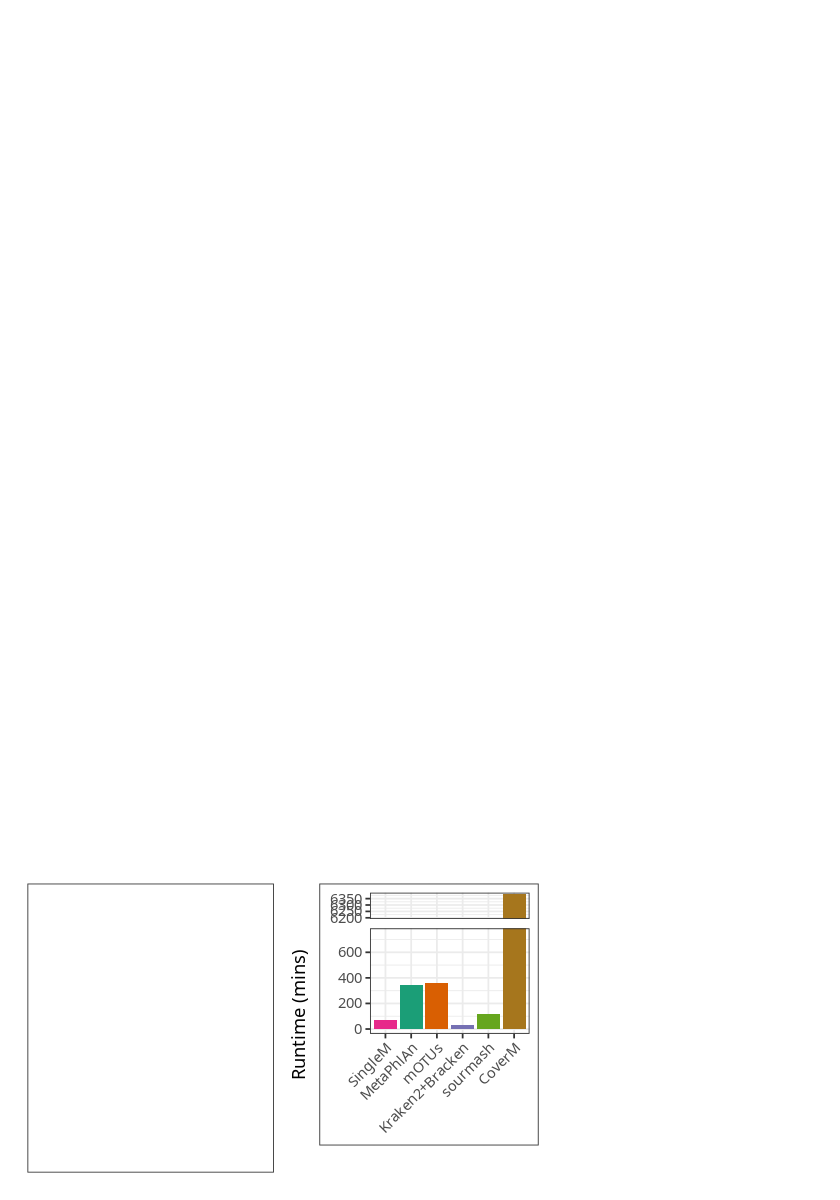

In [18]:
library(patchwork)

plot1 = qplot(data=novelty_benchmark_results[rank=='kingdom'], xlab='', tool2, value, geom='boxplot', colour=tool2, ylab='Bray-Curtis dissimilarity')+facet_grid(kingdom~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none') +scale_color_manual(breaks=tools2_order, values=my_colours)+scale_y_reverse()

plot2 = qplot(data=novelty_benchmark_results[tool != 'kaiju'][rank==orders[as.numeric(novelty_category)-1]], colour=tool2, ylab='Dissimilarity', tool2, value, xlab='', geom='boxplot')+facet_grid(.~novelty_category_novel)+theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_y_reverse() +scale_color_manual(breaks=tools2_order, values=my_colours)

plot31 = qplot(data=marine[rank=='species'], xlab='', ylim=c(0.6,0), tool2, value, geom='boxplot', colour=tool2, ylab='Dissimilarity') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_color_manual(breaks=tools2_order, values=my_colours)

plot32 = qplot(data=runtimes2, xlab='', tool2, mins, geom='col', fill=tool2, ylab='Runtime (mins)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)+scale_y_break(c(750,6200))

plot33 = qplot(data=runtimes2, xlab='', tool2, max_rss, geom='col', fill=tool2, ylab='Memory (GB)') + theme(axis.text.x = element_text(angle = 45, hjust = 1))+theme(legend.position='none')+scale_fill_manual(breaks=tools2_order, values=my_colours)

# scale break messes up patchwork, so make 2 plots and combine in inkscape later
plot1 / plot2 / (plot31 + plot_spacer() + plot33)+ 
  plot_annotation(tag_levels = list(c('A','B','C','E')))+
  plot_layout(heights = c(2,1.2,1.2)) & theme(plot.tag=element_text(vjust=-1.5))
ggsave('fig2_first_half.svg', width=7, height=10)
plot_spacer() / plot_spacer() / (plot_spacer() + plot32 + plot_spacer())+ 
#   plot_annotation(tag_levels = list(c('D')))+
  plot_layout(heights = c(2,1.2,1.2)) & theme(plot.tag=element_text(vjust=-1.5))
ggsave('fig2_second_half.svg', width=7, height=10)
